# Perkenalan

Nama : Pramudya Adi Nugraha

Batch : 10

Dataset : Bank Marketing Data Set

Objective :
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

# Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, OrdinalEncoder,StandardScaler
import scipy.stats as stats
from scipy.stats import norm
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load Dataset 

data = pd.read_csv('bank-additional-full.csv', delimiter= ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Melihat 5 data teratas

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Duplicate Dataset

data_copy = data.copy()

In [5]:
# Check Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Check dataset column

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# Dataset describe

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis (EDA)

In [8]:
# mencari tahu shape dari dataset

data.shape

(41188, 21)

In [9]:
# mencari tahu jumlah missing data pada masing-masing kolom

data_miss = data.isnull().sum()
data_miss.sort_values()

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

In [10]:
# Pada dataset dijelaskan bahwa pada setiap kolom yang nilai missing value diberikan label 'unknow'
# Maka akan dilakukan perubahan label dari 'unknown' menjadi 'NaN'
# Pada kolom pdays terdapat label 999, label tersebut juga termasuk dengan missing value, maka akan dilakukan perubahan label juga

data.replace({'unknown' : np.nan,
              999 : np.nan}, inplace= True)
data.isnull().sum().sort_values()

age                   0
euribor3m             0
cons.conf.idx         0
cons.price.idx        0
emp.var.rate          0
poutcome              0
previous              0
campaign              0
nr.employed           0
y                     0
month                 0
contact               0
day_of_week           0
duration              2
marital              80
job                 330
loan                990
housing             990
education          1731
default            8597
pdays             39673
dtype: int64

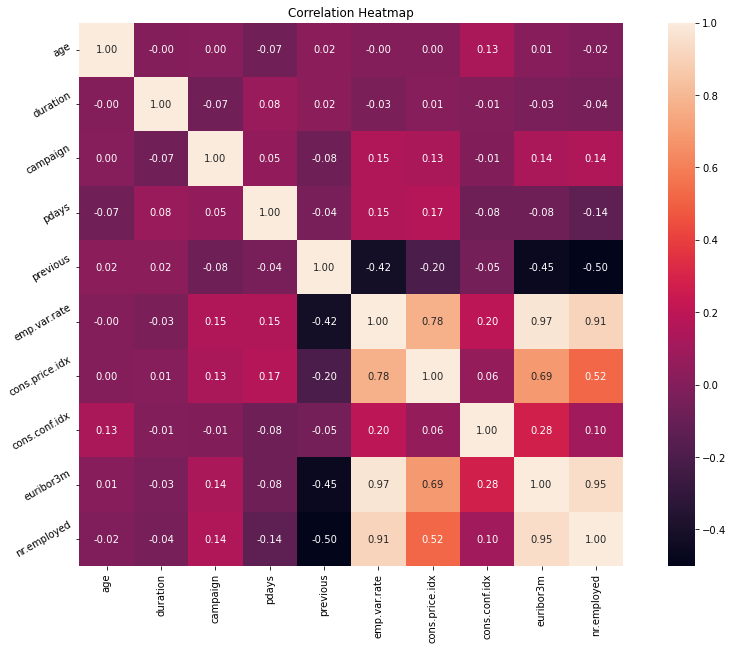

In [11]:
# mencari tahu hubungan antar column pada datset dengan menggunakan heatmap 

correlation = data.corr()

plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [12]:
# Mencari tahu tabel yang memiliki bentuk numerical dan catagorical

data_num = data.select_dtypes(include= np.number).columns.tolist()
data_cat = data.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', data_num)
print('Kolom bertype catagorical pada dataset :', data_cat)

Kolom bertype numeric pada dataset : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Kolom bertype catagorical pada dataset : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [13]:
data.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1543
campaign            42
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [14]:
# Check missing value in `y` Column

data['y'].isnull().sum()

0

In [15]:
# Check unique values in `y` Column

data['y'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
# Frekuensi distribusi value pada kolom `y`

data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [17]:
# Frekuensi distribusi value pada kolom `y` dalam persentase

data['y'].value_counts()/len(data) * 100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [18]:
# Check missing value in `marital` Column

data['marital'].isnull().sum()

80

In [19]:
# Check unique values in `marital` Column

data['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [20]:
# Frekuensi distribusi value pada kolom `marital`

data['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [21]:
# Frekuensi distribusi value pada kolom `marital` dalam persentase

data['marital'].value_counts()/len(data) * 100

married     60.522482
single      28.085850
divorced    11.197436
Name: marital, dtype: float64

In [22]:
# Persentase perbandindingan data tidak missing dengan data missing pada kolom `marital`

print('Presentase data tidak NaN : ', data['marital'].value_counts().sum()/len(data)*100)
print('Persentase data NaN : ', data['marital'].isnull().sum()/len(data)*100)

Presentase data tidak NaN :  99.80576867048654
Persentase data NaN :  0.1942313295134505


In [23]:
# Check missing value in `pdays` Column

data['pdays'].isnull().sum()

39673

In [24]:
# Check unique values in `pdays` Column

data['pdays'].unique()

array([nan,  6.,  4.,  3.,  5.,  1.,  0., 10.,  7.,  8.,  9., 11.,  2.,
       12., 13., 14., 15., 16., 21., 17., 18., 22., 25., 26., 19., 27.,
       20.])

In [25]:
# Frekuensi distribusi value pada kolom `pdays`

data['pdays'].value_counts(dropna= False)

NaN     39673
3.0       439
6.0       412
4.0       118
9.0        64
2.0        61
7.0        60
12.0       58
10.0       52
5.0        46
13.0       36
11.0       28
1.0        26
15.0       24
14.0       20
8.0        18
0.0        15
16.0       11
17.0        8
18.0        7
22.0        3
19.0        3
21.0        2
25.0        1
26.0        1
27.0        1
20.0        1
Name: pdays, dtype: int64

In [26]:
# Frekuensi distribusi value pada kolom `pdays` dalam persentase

data['pdays'].value_counts(dropna= False)/len(data) * 100

NaN     96.321744
3.0      1.065844
6.0      1.000291
4.0      0.286491
9.0      0.155385
2.0      0.148101
7.0      0.145673
12.0     0.140818
10.0     0.126250
5.0      0.111683
13.0     0.087404
11.0     0.067981
1.0      0.063125
15.0     0.058269
14.0     0.048558
8.0      0.043702
0.0      0.036418
16.0     0.026707
17.0     0.019423
18.0     0.016995
22.0     0.007284
19.0     0.007284
21.0     0.004856
25.0     0.002428
26.0     0.002428
27.0     0.002428
20.0     0.002428
Name: pdays, dtype: float64

In [27]:
# Persentase perbandindingan data tidak missing dengan data missing pada kolom `pdays`

print('Presentase data tidak NaN : ', data['pdays'].value_counts().sum()/len(data)*100)
print('Persentase data NaN : ', data['pdays'].isnull().sum()/len(data)*100)

Presentase data tidak NaN :  3.6782558026609693
Persentase data NaN :  96.32174419733903


# Data Preprocessing

In [28]:
# Karena pada kolom `pdays` teradapat nilai missing value yang sangat banyak dengan persentase sebesar 96.322%, maka kolom tersebut akan dilakukan drop
# Drop dilakukan karena missing value tersebut tidak dapat diisi menggunakan mean ataupun median dan kolom tersebut juga tidak memiliki nilai korelasi yang begitu besar dengan kolom lainnya
# Pada kolom duration juga dilakukan drop, karena menurut author dataset jika ingin mendapatkan prediksi yang lebih realistis

data.drop(['pdays', 'duration'], axis= 1, inplace= True)

In [29]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,NaN,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,2.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [30]:
# Dilakukan perubahan bentuk pada kolom `RainTomorrow` dari catagorical menjadi numerical

data['y'] = data['y'].map({'no' : 0,
                           'yes' : 1})
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [31]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state= 18)
data_inf_clear = data_inf.dropna()
data_inf_clear

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19829,49.0,admin.,married,high.school,no,no,no,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
28042,32.0,technician,single,university.degree,no,yes,no,cellular,apr,thu,2.0,1.0,failure,-1.8,93.075,-47.1,1.483,5099.1,0
22342,31.0,technician,divorced,university.degree,no,yes,no,cellular,aug,thu,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
25731,29.0,management,single,university.degree,no,no,no,cellular,nov,wed,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,1
34144,28.0,services,single,high.school,no,no,no,cellular,may,wed,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,1
32306,43.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,1.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0
27749,23.0,admin.,single,university.degree,no,yes,no,cellular,mar,thu,2.0,0.0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0
4614,46.0,services,married,professional.course,no,yes,no,telephone,may,tue,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


In [32]:
# Remove Inference-Set from Dataset

data_new = data.drop(data_inf_clear.index)
data_new

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,NaN,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,2.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [33]:
# Reset Index

data_new.reset_index(drop=True, inplace=True)
data_inf_clear.reset_index(drop=True, inplace=True)
data_inf_clear

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49.0,admin.,married,high.school,no,no,no,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
1,32.0,technician,single,university.degree,no,yes,no,cellular,apr,thu,2.0,1.0,failure,-1.8,93.075,-47.1,1.483,5099.1,0
2,31.0,technician,divorced,university.degree,no,yes,no,cellular,aug,thu,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
3,29.0,management,single,university.degree,no,no,no,cellular,nov,wed,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,1
4,28.0,services,single,high.school,no,no,no,cellular,may,wed,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,1
5,43.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,1.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0
6,23.0,admin.,single,university.degree,no,yes,no,cellular,mar,thu,2.0,0.0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0
7,46.0,services,married,professional.course,no,yes,no,telephone,may,tue,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


## Splitting Dataset

In [34]:
# Split between X (features) and y (target)

X = data_new.drop('y', axis=1)
y = data_new['y']
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57.0,services,married,high.school,NaN,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41175,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41176,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41177,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,2.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41178,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,1.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [35]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41175    1
41176    0
41177    0
41178    1
41179    0
Name: y, Length: 41180, dtype: int64

In [36]:
# Split between Train-Set and Test-Set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (32944, 18)
X Test Size  :  (8236, 18)
y Train Size :  (32944,)
y Test Size  :  (8236,)


---
## Handling Outlier

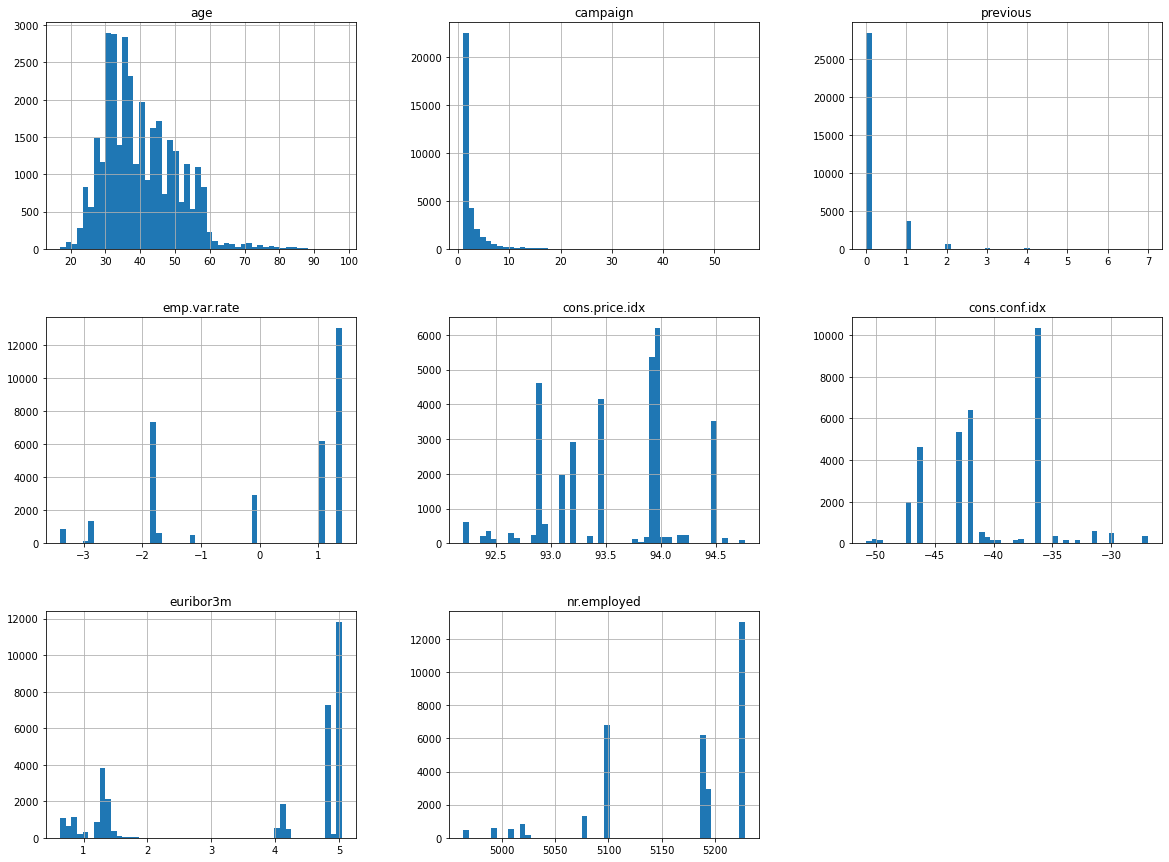

In [37]:
# Mencari tahu distribusi data dan visualisasi

X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [38]:
def skew_func (data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    print(f'Skewness of {column} = ', skewness)

In [39]:
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()

In [40]:
for column in num_columns:
    skew_func(data, column)

Skewness of age =  0.7846968157646645
Skewness of campaign =  4.762506697067009
Skewness of previous =  3.8320422428611836
Skewness of emp.var.rate =  -0.7240955492472556
Skewness of cons.price.idx =  -0.23088765135788006
Skewness of cons.conf.idx =  0.30317985874819237
Skewness of euribor3m =  -0.7091879563778298
Skewness of nr.employed =  -1.044262407089151


In [41]:
def outiers_val(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        batas_atas = data[column].mean() + data[column].std()
        batas_bawah =  data[column].mean() - data[column].std()
        print('[Normal]')
        print(f'Batas atas {column} = {batas_atas}')
        print(f'Batas bawah {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)
    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        batas_bawah = data[column].quantile(0.25) - (IQR * 1.5)
        batas_atas = data[column].quantile(0.75) + (IQR * 1.5)
        print('[Skewed]')
        print(f'Batas atas dari {column} = {batas_atas}')
        print(f'Batas bawah dari {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)

In [42]:
num_data_outlier = X_train.select_dtypes(include= np.number).columns.tolist()

In [43]:
for features in num_data_outlier:
    outiers_val(X_train, features)

[Skewed]
Batas atas dari age = 69.5
Batas bawah dari age = 9.5
Total data melebihi batas atas : 376
Total data kurang dari batas bawah : 0
% melebihi batas atas : 1.1413307430791646
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Batas atas dari campaign = 6.0
Batas bawah dari campaign = -2.0
Total data melebihi batas atas : 1954
Total data kurang dari batas bawah : 0
% melebihi batas atas : 5.931277319086935
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Batas atas dari previous = 0.0
Batas bawah dari previous = 0.0
Total data melebihi batas atas : 4490
Total data kurang dari batas bawah : 0
% melebihi batas atas : 13.62918892666343
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Skewed]
Batas atas dari emp.var.rat

### Capping

In [44]:
# Akan dilakukan capping pada kolom dengan persentase outlier 5 - 15% 
# Kolom yang akan dilakukan capping adalah campaign

print('X_train shape sebelum dilakukan handling :', X_train.shape)
outlier_trim = Winsorizer(capping_method= 'iqr',
                              tail= 'both',
                              fold = 1.5,
                              variables= ['campaign'],
                              missing_values= 'ignore')
outlier_trim.fit(X_train)

X_train = outlier_trim.transform(X_train)
print('X_train shape setelah dilakukan handling :', X_train.shape)

X_train shape sebelum dilakukan handling : (32944, 18)
X_train shape setelah dilakukan handling : (32944, 18)


### Trimming

In [45]:
# Akan dilakukan capping pada kolom dengan persentase outlier > 5%
# Kolom yang akan dilakukan capping adalah age

print('X_train shape sebelum dilakukan handling :', X_train.shape)
outlier_trim = OutlierTrimmer(capping_method= 'iqr',
                              tail= 'both',
                              fold = 3,
                              variables= ['age'],
                              missing_values= 'ignore')
outlier_trim.fit(X_train)

X_train = outlier_trim.transform(X_train)
print('X_train shape setelah dilakukan handling :', X_train.shape)

X_train shape sebelum dilakukan handling : (32944, 18)
X_train shape setelah dilakukan handling : (32940, 18)


In [46]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
38857,25.0,admin.,single,NaN,no,yes,no,telephone,nov,mon,4.0,0.0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5
18466,32.0,technician,single,professional.course,no,yes,yes,cellular,jul,thu,1.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
28455,46.0,admin.,married,professional.course,no,yes,no,cellular,apr,tue,1.0,0.0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1
27621,42.0,admin.,married,high.school,no,yes,no,cellular,nov,fri,2.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
6706,35.0,blue-collar,divorced,basic.4y,no,yes,yes,telephone,may,wed,3.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,41.0,self-employed,married,university.degree,no,yes,no,telephone,may,fri,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1726,59.0,admin.,married,university.degree,no,no,yes,telephone,may,fri,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
35653,34.0,admin.,married,university.degree,no,no,yes,cellular,may,mon,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
25720,38.0,admin.,married,basic.9y,no,yes,yes,cellular,nov,wed,2.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


In [47]:
y_train_new = y_train[X_train.index]
y_train_new.shape

(32940,)

---
## Handling Missing Values

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32940 entries, 38857 to 28947
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32940 non-null  float64
 1   job             32664 non-null  object 
 2   marital         32873 non-null  object 
 3   education       31552 non-null  object 
 4   default         26032 non-null  object 
 5   housing         32159 non-null  object 
 6   loan            32159 non-null  object 
 7   contact         32940 non-null  object 
 8   month           32940 non-null  object 
 9   day_of_week     32940 non-null  object 
 10  campaign        32940 non-null  float64
 11  previous        32940 non-null  float64
 12  poutcome        32940 non-null  object 
 13  emp.var.rate    32940 non-null  float64
 14  cons.price.idx  32940 non-null  float64
 15  cons.conf.idx   32940 non-null  float64
 16  euribor3m       32940 non-null  float64
 17  nr.employed     32940 non-n

In [49]:
# Check missing values on X_train

X_train.isnull().sum()

age                  0
job                276
marital             67
education         1388
default           6908
housing            781
loan               781
contact              0
month                0
day_of_week          0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [50]:
# handling missing value pada kolom catagorical

miss_cat = CategoricalImputer(imputation_method= 'frequent',
                              variables= ['job',
                                          'marital',
                                          'education',
                                          'default',
                                          'housing',
                                          'loan'],
                              return_object= False,
                              ignore_format=False)
miss_cat.fit(X_train)
X_train_handled = miss_cat.transform(X_train)
X_test = miss_cat.transform(X_test)

In [51]:
X_train_handled.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [52]:
# Check missing values on X_test

X_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [53]:
# Check missing values on y_train

y_train_new.isnull().sum()

0

In [54]:
# Check missing values on y_test

y_test.isnull().sum()

0

---
## Feature Selection

In [55]:
# Display X_train_handled

X_train_handled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
38857,25.0,admin.,single,university.degree,no,yes,no,telephone,nov,mon,4.0,0.0,nonexistent,-3.4,92.649,-30.1,0.714,5017.5
18466,32.0,technician,single,professional.course,no,yes,yes,cellular,jul,thu,1.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
28455,46.0,admin.,married,professional.course,no,yes,no,cellular,apr,tue,1.0,0.0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1
27621,42.0,admin.,married,high.school,no,yes,no,cellular,nov,fri,2.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
6706,35.0,blue-collar,divorced,basic.4y,no,yes,yes,telephone,may,wed,3.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,41.0,self-employed,married,university.degree,no,yes,no,telephone,may,fri,6.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1726,59.0,admin.,married,university.degree,no,no,yes,telephone,may,fri,1.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
35653,34.0,admin.,married,university.degree,no,no,yes,cellular,may,mon,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
25720,38.0,admin.,married,basic.9y,no,yes,yes,cellular,nov,wed,2.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


In [56]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2166,56.0,admin.,married,high.school,no,yes,no,telephone,may,mon,2.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8656,40.0,blue-collar,married,basic.4y,no,no,no,telephone,jun,wed,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
33448,55.0,blue-collar,married,basic.4y,no,yes,no,telephone,may,tue,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1
4910,29.0,admin.,single,basic.9y,no,yes,no,telephone,may,wed,2.0,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0
23296,52.0,admin.,divorced,university.degree,no,no,no,cellular,aug,wed,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22163,35.0,technician,single,professional.course,no,yes,no,cellular,aug,thu,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
8498,26.0,blue-collar,married,basic.9y,no,yes,no,telephone,jun,wed,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
33804,41.0,technician,married,basic.9y,no,yes,no,cellular,may,wed,1.0,1.0,failure,-1.8,92.893,-46.2,1.281,5099.1
21679,47.0,blue-collar,married,basic.6y,no,yes,no,cellular,aug,tue,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1


In [57]:
y_train_table = pd.DataFrame(y_train_new, columns= ['y'])
y_train_table

,y
38857,0
18466,0
28455,0
27621,0
6706,0
...,...
5294,0
1726,0
35653,0
25720,0


In [58]:
# menggabungkan X_train_handled dan y_train_table

data_kor = X_train_handled.copy()
data_kor['y'] = y_train_table['y']
data_kor.shape

(32940, 19)

<AxesSubplot:>

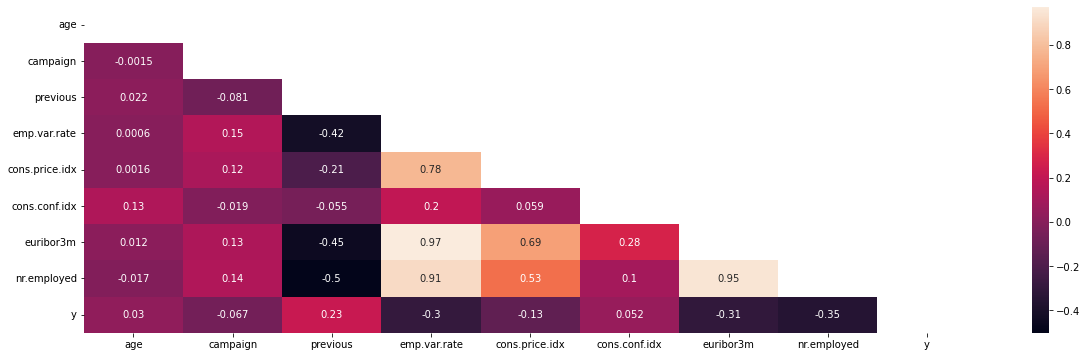

In [59]:
plt.figure(figsize=(20,6))
sns.heatmap(data_kor.corr(),annot=True, mask=np.triu(data_kor.corr()))

- Dari hasil visualisasi heatmap di atas dapat dilihat bahwa kolom yang memiliki korelasi paling tinggi terhadap kolom `y` adalah kolom `duration` dan yang terkecil adalah kolom `age`
- kolom dengan tingkat korelasi dibawah 0.1, maka akan dilakukan drop yaitu kolom `age`, `campaign`, dan `cons.conf.idx`

In [60]:
num_col = X_train_handled.select_dtypes(include= np.number).columns.tolist()
cat_col = X_train_handled.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', num_col)
print('Kolom bertype catagorical pada dataset :', cat_col)

Kolom bertype numeric pada dataset : ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Kolom bertype catagorical pada dataset : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [61]:
X_train_handled.drop(['age', 'campaign', 'cons.conf.idx', 'default', 'contact', 'month', 'day_of_week', 'previous'], axis = 1, inplace= True)
X_test.drop(['age', 'campaign', 'cons.conf.idx', 'default', 'contact', 'month', 'day_of_week', 'previous'], axis = 1, inplace= True)

---
## Split between numerical and categorical columns


In [62]:
X_train_handled

,job,marital,education,housing,loan,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
38857,admin.,single,university.degree,yes,no,nonexistent,-3.4,92.649,0.714,5017.5
18466,technician,single,professional.course,yes,yes,nonexistent,1.4,93.918,4.968,5228.1
28455,admin.,married,professional.course,yes,no,nonexistent,-1.8,93.075,1.423,5099.1
27621,admin.,married,high.school,yes,no,nonexistent,-0.1,93.200,4.021,5195.8
6706,blue-collar,divorced,basic.4y,yes,yes,nonexistent,1.1,93.994,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
5294,self-employed,married,university.degree,yes,no,nonexistent,1.1,93.994,4.857,5191.0
1726,admin.,married,university.degree,no,yes,nonexistent,1.1,93.994,4.855,5191.0
35653,admin.,married,university.degree,no,yes,nonexistent,-1.8,92.893,1.244,5099.1
25720,admin.,married,basic.9y,yes,yes,nonexistent,-0.1,93.200,4.120,5195.8


In [63]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_handled.select_dtypes(include=np.number).columns.tolist()
cat_columns_ordinal = X_train_handled[['education']].columns.to_list()
cat_columns_nominal = X_train_handled[['marital', 'job', 'housing', 'loan', 'poutcome']].columns.to_list()

print('Numerical Columns : ', num_columns)
print('Categorical Columns ordinal : ', cat_columns_ordinal)
print('Categorical Columns nominal : ', cat_columns_nominal)

Numerical Columns :  ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
Categorical Columns ordinal :  ['education']
Categorical Columns nominal :  ['marital', 'job', 'housing', 'loan', 'poutcome']


In [64]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train_handled[num_columns]
X_train_cat_ordinal = X_train_handled[cat_columns_ordinal]
X_train_cat_nominal = X_train_handled[cat_columns_nominal]

X_test_num = X_test[num_columns]
X_test_cat_ordinal = X_test[cat_columns_ordinal]
X_test_cat_nominal = X_test[cat_columns_nominal]

---
## Feature Scaling

In [65]:
# Display X_train_num

X_train_num

,emp.var.rate,cons.price.idx,euribor3m,nr.employed
38857,-3.4,92.649,0.714,5017.5
18466,1.4,93.918,4.968,5228.1
28455,-1.8,93.075,1.423,5099.1
27621,-0.1,93.200,4.021,5195.8
6706,1.1,93.994,4.857,5191.0
...,...,...,...,...
5294,1.1,93.994,4.857,5191.0
1726,1.1,93.994,4.855,5191.0
35653,-1.8,92.893,1.244,5099.1
25720,-0.1,93.200,4.120,5195.8


In [66]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-2.22180619, -1.60288943, -1.68187062, -2.0803381 ],
       [ 0.83673205,  0.59057995,  0.77419992,  0.84337054],
       [-1.20229345, -0.86654746, -1.27252553, -0.94750512],
       ...,
       [-1.20229345, -1.18113488, -1.37587217, -0.94750512],
       [-0.11906115, -0.65048468,  0.28460241,  0.39495748],
       [-1.20229345, -0.86654746, -1.28291793, -0.94750512]])

---
## Feature Encoding

In [67]:
# Display X_train_cat_nominal

X_train_cat_nominal

,marital,job,housing,loan,poutcome
38857,single,admin.,yes,no,nonexistent
18466,single,technician,yes,yes,nonexistent
28455,married,admin.,yes,no,nonexistent
27621,married,admin.,yes,no,nonexistent
6706,divorced,blue-collar,yes,yes,nonexistent
...,...,...,...,...,...
5294,married,self-employed,yes,no,nonexistent
1726,married,admin.,no,yes,nonexistent
35653,married,admin.,no,yes,nonexistent
25720,married,admin.,yes,yes,nonexistent


In [68]:
# Feature Encoding using OneHotEncoder
# Encoding pada kolom dengan type categorical nominal

encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

X_train_cat_nominal_enc = encoder.fit_transform(X_train_cat_nominal)
X_test_cat_nominal_enc = encoder.transform(X_test_cat_nominal)
X_train_cat_nominal_enc

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [69]:
# Display X_train_cat_ordinal

X_train_cat_ordinal

,education
38857,university.degree
18466,professional.course
28455,professional.course
27621,high.school
6706,basic.4y
...,...
5294,university.degree
1726,university.degree
35653,university.degree
25720,basic.9y


In [70]:
# Feature Encoding using OrdinalEncoder
# Encoding pada kolom dengan type categorical ordinal

encoder2 = OrdinalEncoder()

X_train_cat_ordinal_enc = encoder2.fit_transform(X_train_cat_ordinal)
X_test_cat_ordinal_enc = encoder2.transform(X_test_cat_ordinal)
X_train_cat_ordinal_enc

array([[6.],
       [5.],
       [5.],
       ...,
       [6.],
       [2.],
       [6.]])

---
## Concat between Numerical Columns and Categorical Columns

In [71]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_ordinal_enc, X_train_cat_nominal_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_nominal_enc, X_test_cat_ordinal_enc], axis=1)
X_train_final

array([[-2.22180619, -1.60288943, -1.68187062, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83673205,  0.59057995,  0.77419992, ...,  0.        ,
         1.        ,  0.        ],
       [-1.20229345, -0.86654746, -1.27252553, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.20229345, -1.18113488, -1.37587217, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11906115, -0.65048468,  0.28460241, ...,  0.        ,
         1.        ,  0.        ],
       [-1.20229345, -0.86654746, -1.28291793, ...,  0.        ,
         1.        ,  0.        ]])

In [72]:
X_train_final.shape

(32940, 26)

# Model Definition

## Logistic Regression

In [73]:
# Training using Logistic Regression

model_log_reg = LogisticRegression()

## SVM

In [74]:
# Training using polynomials

model_svm = SVC()

## Decission Tree

In [75]:
# Training using Decission Tree

model_dt = DecisionTreeClassifier()

## Random Forest

In [76]:
# Training using Random Forest

model_rf = RandomForestClassifier()

## KNN

In [77]:
# Training using KNN

model_knn = KNeighborsClassifier()

## Naive Bayes

In [78]:
# Training using Naive Bayes

model_nb = GaussianNB()

## XGBoost

In [79]:
model_xgb = XGBClassifier()

# Model Training

## Logistic Regression

In [80]:
# Train the Model

model_log_reg.fit(X_train_final, y_train_new)

LogisticRegression()

## SVM

In [81]:
model_svm.fit(X_train_final, y_train_new)

SVC()

## Decission Tree

In [82]:
model_dt.fit(X_train_final, y_train_new)

DecisionTreeClassifier()

## Random Forest

In [83]:
model_rf.fit(X_train_final, y_train_new)

RandomForestClassifier()

## KNN

In [84]:
model_knn.fit(X_train_final, y_train_new)

KNeighborsClassifier()

## Naive Bayes

In [85]:
model_nb.fit(X_train_final, y_train_new)

GaussianNB()

## XGBoost

In [86]:
model_xgb.fit(X_train_final, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Model Evaluation

## Logistic Regression

In [87]:
# Get Prediction of Train-Set and Test-Set

y_pred_train_log = model_log_reg.predict(X_train_final)
y_pred_test_log = model_log_reg.predict(X_test_final)

## SVM

In [88]:
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

## Decission Tree

In [89]:
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_test_dt = model_dt.predict(X_test_final)

## Random Forest

In [90]:
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)

## KNN

In [91]:
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

## Naive Bayes

In [92]:
y_pred_train_nb = model_nb.predict(X_train_final)
y_pred_test_nb = model_nb.predict(X_test_final)

## XGBoost

In [93]:
y_pred_train_xgb = model_xgb.predict(X_train_final)
y_pred_test_xgb = model_xgb.predict(X_test_final)

## Evaluate model using classification report

### Logistic Regression

In [94]:
logreg_train_cross_val = cross_val_score(model_log_reg, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', logreg_train_cross_val)
print('f1 score - Mean - Cross Validation : ', logreg_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', logreg_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (logreg_train_cross_val.mean()-logreg_train_cross_val.std()) , '-', (logreg_train_cross_val.mean()+logreg_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.86839909 0.87434671 0.87028985]
f1 score - Mean - Cross Validation :  0.8710118810493409
f1 score - Std - Cross Validation  :  0.0024812013480230797
f1 score - Range of Test-Set       :  0.8685306797013178 - 0.873493082397364


In [95]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_log))
print('Error - Test  : ', classification_report(y_test, y_pred_test_log))

Error - Train :                precision    recall  f1-score   support

           0       0.90      0.99      0.95     29216
           1       0.70      0.18      0.29      3724

    accuracy                           0.90     32940
   macro avg       0.80      0.59      0.62     32940
weighted avg       0.88      0.90      0.87     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.94      0.41      0.57      7324
           1       0.14      0.79      0.24       912

    accuracy                           0.45      8236
   macro avg       0.54      0.60      0.41      8236
weighted avg       0.85      0.45      0.53      8236



In [96]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_log, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_log, average='weighted'))
print('f1-score - Range of Test-Set : ', (logreg_train_cross_val.mean()-logreg_train_cross_val.std()) , '-', (logreg_train_cross_val.mean()+logreg_train_cross_val.std()))

f1-score Train-set : 0.8711182478963215
f1-score Test-set: 0.533783383090396
f1-score - Range of Test-Set :  0.8685306797013178 - 0.873493082397364


### SVM

In [97]:
svm_train_cross_val = cross_val_score(model_svm, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', svm_train_cross_val)
print('f1 score - Mean - Cross Validation : ', svm_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', svm_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (svm_train_cross_val.mean()-svm_train_cross_val.std()) , '-', (svm_train_cross_val.mean()+svm_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.86873781 0.87329013 0.87219027]
f1 score - Mean - Cross Validation :  0.8714060729409018
f1 score - Std - Cross Validation  :  0.0019394366057171363
f1 score - Range of Test-Set       :  0.8694666363351846 - 0.8733455095466189


In [98]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_svm))
print('Error - Test  : ', classification_report(y_test, y_pred_test_svm))

Error - Train :                precision    recall  f1-score   support

           0       0.91      0.99      0.94     29216
           1       0.67      0.19      0.30      3724

    accuracy                           0.90     32940
   macro avg       0.79      0.59      0.62     32940
weighted avg       0.88      0.90      0.87     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.95      0.75      0.84      7324
           1       0.25      0.65      0.36       912

    accuracy                           0.74      8236
   macro avg       0.60      0.70      0.60      8236
weighted avg       0.87      0.74      0.78      8236



In [99]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_svm, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_svm, average='weighted'))
print('f1-score - Range of Test-Set : ', (svm_train_cross_val.mean()-svm_train_cross_val.std()) , '-', (svm_train_cross_val.mean()+svm_train_cross_val.std()))

f1-score Train-set : 0.8715084109770664
f1-score Test-set: 0.7835098305863256
f1-score - Range of Test-Set :  0.8694666363351846 - 0.8733455095466189


### Decission Tree

In [100]:
dt_train_cross_val = cross_val_score(model_dt, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', dt_train_cross_val)
print('f1 score - Mean - Cross Validation : ', dt_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', dt_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (dt_train_cross_val.mean()-dt_train_cross_val.std()) , '-', (dt_train_cross_val.mean()+dt_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.85878868 0.85927245 0.85915652]
f1 score - Mean - Cross Validation :  0.8590725480472954
f1 score - Std - Cross Validation  :  0.0002062292982784155
f1 score - Range of Test-Set       :  0.858866318749017 - 0.8592787773455738


In [101]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_dt))
print('Error - Test  : ', classification_report(y_test, y_pred_test_dt))

Error - Train :                precision    recall  f1-score   support

           0       0.95      1.00      0.98     29216
           1       0.98      0.62      0.76      3724

    accuracy                           0.96     32940
   macro avg       0.97      0.81      0.87     32940
weighted avg       0.96      0.96      0.95     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.92      0.86      0.89      7324
           1       0.26      0.38      0.31       912

    accuracy                           0.81      8236
   macro avg       0.59      0.62      0.60      8236
weighted avg       0.84      0.81      0.82      8236



In [102]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_dt, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_dt, average='weighted'))
print('f1-score - Range of Test-Set : ', (dt_train_cross_val.mean()-dt_train_cross_val.std()) , '-', (dt_train_cross_val.mean()+dt_train_cross_val.std()))

f1-score Train-set : 0.9507130725920957
f1-score Test-set: 0.8241544093071002
f1-score - Range of Test-Set :  0.858866318749017 - 0.8592787773455738


### Random Forest

In [103]:
rf_train_cross_val = cross_val_score(model_rf, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', rf_train_cross_val)
print('f1 score - Mean - Cross Validation : ', rf_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', rf_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (rf_train_cross_val.mean()-rf_train_cross_val.std()) , '-', (rf_train_cross_val.mean()+rf_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.86776062 0.8680764  0.86737325]
f1 score - Mean - Cross Validation :  0.8677367579992782
f1 score - Std - Cross Validation  :  0.00028755656426306364
f1 score - Range of Test-Set       :  0.8674492014350151 - 0.8680243145635412


In [104]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_rf))
print('Error - Test  : ', classification_report(y_test, y_pred_test_rf))

Error - Train :                precision    recall  f1-score   support

           0       0.96      0.99      0.98     29216
           1       0.94      0.65      0.77      3724

    accuracy                           0.96     32940
   macro avg       0.95      0.82      0.87     32940
weighted avg       0.95      0.96      0.95     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.92      0.95      0.93      7324
           1       0.44      0.33      0.38       912

    accuracy                           0.88      8236
   macro avg       0.68      0.64      0.65      8236
weighted avg       0.87      0.88      0.87      8236



In [105]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_rf, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_rf, average='weighted'))
print('f1-score - Range of Test-Set : ', (rf_train_cross_val.mean()-rf_train_cross_val.std()) , '-', (rf_train_cross_val.mean()+rf_train_cross_val.std()))

f1-score Train-set : 0.9515676678172958
f1-score Test-set: 0.8717484510943574
f1-score - Range of Test-Set :  0.8674492014350151 - 0.8680243145635412


### KNN

In [106]:
knn_train_cross_val = cross_val_score(model_knn, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', knn_train_cross_val)
print('f1 score - Mean - Cross Validation : ', knn_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', knn_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (knn_train_cross_val.mean()-knn_train_cross_val.std()) , '-', (knn_train_cross_val.mean()+knn_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.87035121 0.87333013 0.86840771]
f1 score - Mean - Cross Validation :  0.8706963527394559
f1 score - Std - Cross Validation  :  0.0020243334862800454
f1 score - Range of Test-Set       :  0.8686720192531758 - 0.872720686225736


In [107]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_knn))
print('Error - Test  : ', classification_report(y_test, y_pred_test_knn))

Error - Train :                precision    recall  f1-score   support

           0       0.92      0.98      0.95     29216
           1       0.72      0.35      0.47      3724

    accuracy                           0.91     32940
   macro avg       0.82      0.67      0.71     32940
weighted avg       0.90      0.91      0.90     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.93      0.91      0.92      7324
           1       0.36      0.41      0.39       912

    accuracy                           0.85      8236
   macro avg       0.64      0.66      0.65      8236
weighted avg       0.86      0.85      0.86      8236



In [108]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_knn, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_knn, average='weighted'))
print('f1-score - Range of Test-Set : ', (knn_train_cross_val.mean()-knn_train_cross_val.std()) , '-', (knn_train_cross_val.mean()+knn_train_cross_val.std()))

f1-score Train-set : 0.8970697849523818
f1-score Test-set: 0.858199338600894
f1-score - Range of Test-Set :  0.8686720192531758 - 0.872720686225736


### Naive Bayes

In [109]:
nb_train_cross_val = cross_val_score(model_nb, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', nb_train_cross_val)
print('f1 score - Mean - Cross Validation : ', nb_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', nb_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (nb_train_cross_val.mean()-nb_train_cross_val.std()) , '-', (nb_train_cross_val.mean()+nb_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.84090848 0.83866205 0.83261969]
f1 score - Mean - Cross Validation :  0.8373967391953623
f1 score - Std - Cross Validation  :  0.0035001711081076325
f1 score - Range of Test-Set       :  0.8338965680872547 - 0.8408969103034699


In [110]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_nb))
print('Error - Test  : ', classification_report(y_test, y_pred_test_nb))

Error - Train :                precision    recall  f1-score   support

           0       0.93      0.86      0.89     29216
           1       0.31      0.49      0.38      3724

    accuracy                           0.82     32940
   macro avg       0.62      0.68      0.64     32940
weighted avg       0.86      0.82      0.84     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.94      0.05      0.09      7324
           1       0.11      0.97      0.20       912

    accuracy                           0.15      8236
   macro avg       0.53      0.51      0.15      8236
weighted avg       0.85      0.15      0.11      8236



In [111]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_nb, average='weighted')) 
print('f1-score Test-set:', f1_score(y_test, y_pred_test_nb, average='weighted'))
print('f1-score - Range of Test-Set : ', (nb_train_cross_val.mean()-nb_train_cross_val.std()) , '-', (nb_train_cross_val.mean()+nb_train_cross_val.std()))

f1-score Train-set : 0.8367841846212773
f1-score Test-set: 0.10665124707283048
f1-score - Range of Test-Set :  0.8338965680872547 - 0.8408969103034699


### XGBoost

In [112]:
xgb_train_cross_val = cross_val_score(model_xgb, 
                                      X_train_final, 
                                      y_train_new, 
                                      cv=3, scoring="f1_weighted")

print('f1 score - All - Cross Validation  : ', xgb_train_cross_val)
print('f1 score - Mean - Cross Validation : ', xgb_train_cross_val.mean())
print('f1 score - Std - Cross Validation  : ', xgb_train_cross_val.std())
print('f1 score - Range of Test-Set       : ', (xgb_train_cross_val.mean()-xgb_train_cross_val.std()) , '-', (xgb_train_cross_val.mean()+xgb_train_cross_val.std()))

f1 score - All - Cross Validation  :  [0.87455428 0.87651759 0.87697996]
f1 score - Mean - Cross Validation :  0.876017276082541
f1 score - Std - Cross Validation  :  0.001051575817002768
f1 score - Range of Test-Set       :  0.8749657002655382 - 0.8770688518995438


In [113]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_xgb))
print('Error - Test  : ', classification_report(y_test, y_pred_test_xgb))

Error - Train :                precision    recall  f1-score   support

           0       0.92      0.99      0.96     29216
           1       0.84      0.36      0.50      3724

    accuracy                           0.92     32940
   macro avg       0.88      0.68      0.73     32940
weighted avg       0.91      0.92      0.91     32940

Error - Test  :                precision    recall  f1-score   support

           0       0.93      0.93      0.93      7324
           1       0.44      0.44      0.44       912

    accuracy                           0.88      8236
   macro avg       0.69      0.69      0.69      8236
weighted avg       0.88      0.88      0.88      8236



In [114]:
print('f1-score Train-set :', f1_score(y_train_new, y_pred_train_xgb, average='weighted'))
print('f1-score Test-set:', f1_score(y_test, y_pred_test_xgb, average='weighted'))
print('f1-score - Range of Test-Set : ', (xgb_train_cross_val.mean()-xgb_train_cross_val.std()) , '-', (xgb_train_cross_val.mean()+xgb_train_cross_val.std()))

f1-score Train-set : 0.9050759141398964
f1-score Test-set: 0.8767634926449885
f1-score - Range of Test-Set :  0.8749657002655382 - 0.8770688518995438


f1 score - Train Set  :  0.8711182478963215 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     29216
           1       0.70      0.18      0.29      3724

    accuracy                           0.90     32940
   macro avg       0.80      0.59      0.62     32940
weighted avg       0.88      0.90      0.87     32940
 

Confusion Matrix      : 


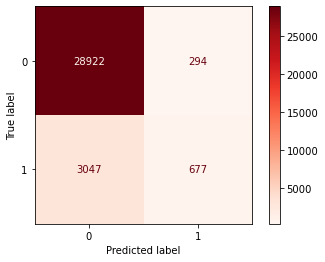

In [137]:
# Check Performance Model against Train-Set 

y_pred_train_log = model_log_reg.predict(X_train_final)

print('f1 score - Train Set  : ', f1_score(y_train_new, y_pred_train_log, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_log), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_log_reg, X_train_final, y_train_new, cmap='Reds'))

f1 score - Train Set  :  0.8715084109770664 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94     29216
           1       0.67      0.19      0.30      3724

    accuracy                           0.90     32940
   macro avg       0.79      0.59      0.62     32940
weighted avg       0.88      0.90      0.87     32940
 

Confusion Matrix      : 


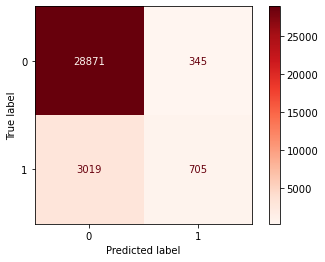

In [136]:
y_pred_train_svm = model_svm.predict(X_train_final)

print('f1 score - Train Set  : ', f1_score(y_train_new, y_pred_train_svm, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm, X_train_final, y_train_new, cmap='Reds'))

f1 score - Train Set  :  0.9507130725920957 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     29216
           1       0.98      0.62      0.76      3724

    accuracy                           0.96     32940
   macro avg       0.97      0.81      0.87     32940
weighted avg       0.96      0.96      0.95     32940
 

Confusion Matrix      : 


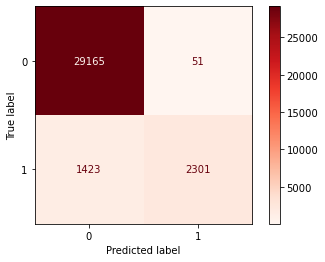

In [135]:
y_pred_train_dt = model_dt.predict(X_train_final)

print('f1 score - Train Set  : ', f1_score(y_train_new, y_pred_train_dt, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dt, X_train_final, y_train_new, cmap='Reds'))

f1 score - Train Set  :  0.9515676678172958 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     29216
           1       0.94      0.65      0.77      3724

    accuracy                           0.96     32940
   macro avg       0.95      0.82      0.87     32940
weighted avg       0.95      0.96      0.95     32940
 

Confusion Matrix      : 


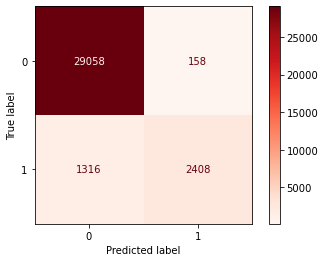

In [134]:
y_pred_train_rf = model_rf.predict(X_train_final)

print('f1 score - Train Set  : ', f1_score(y_train_new, y_pred_train_rf, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, X_train_final, y_train_new, cmap='Reds'))

f1 score - Train Set  :  0.8970697849523818 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     29216
           1       0.72      0.35      0.47      3724

    accuracy                           0.91     32940
   macro avg       0.82      0.67      0.71     32940
weighted avg       0.90      0.91      0.90     32940
 

Confusion Matrix      : 


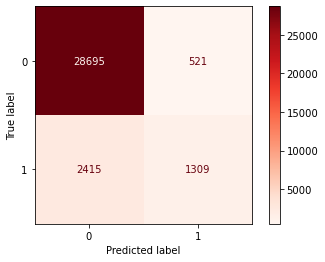

In [119]:
y_pred_train_knn = model_knn.predict(X_train_final)

print('f1 score - Train Set  : ', f1_score(y_train_new, y_pred_train_knn, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, X_train_final, y_train_new, cmap='Reds'))

f1 score- Train Set  :  0.8367841846212773 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89     29216
           1       0.31      0.49      0.38      3724

    accuracy                           0.82     32940
   macro avg       0.62      0.68      0.64     32940
weighted avg       0.86      0.82      0.84     32940
 

Confusion Matrix      : 


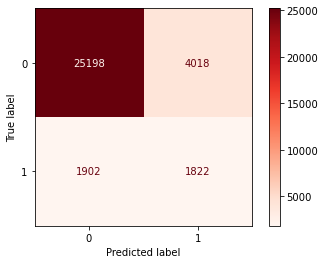

In [120]:
y_pred_train_nb = model_nb.predict(X_train_final)

print('f1 score- Train Set  : ', f1_score(y_train_new, y_pred_train_nb, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_nb, X_train_final, y_train_new, cmap='Reds'))

f1 score - Train Set  :  0.9050759141398964 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     29216
           1       0.84      0.36      0.50      3724

    accuracy                           0.92     32940
   macro avg       0.88      0.68      0.73     32940
weighted avg       0.91      0.92      0.91     32940
 

Confusion Matrix      : 


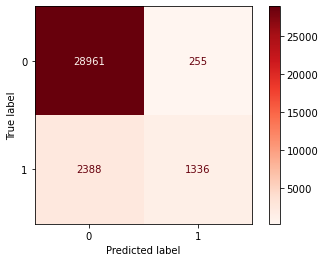

In [121]:
y_pred_train_xgb = model_xgb.predict(X_train_final)

print('f1 score - Train Set  : ', f1_score(y_train_new, y_pred_train_xgb, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_xgb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb, X_train_final, y_train_new, cmap='Reds'))

### Hyperparameter tunning

In [138]:
XGBClassifier._get_param_names()

['objective', 'use_label_encoder']

In [148]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgboost_gridcv = GridSearchCV(estimator=XGBClassifier(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

xgboost_gridcv.fit(X_train_final, y_train_new)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [149]:
# Get Best Hyperparameters

xgboost_gridcv.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 4,
 'min_child_weight': 5,
 'subsample': 1.0}

In [150]:
# Get Best Estimator

xgboost_gridcv_best = xgboost_gridcv.best_estimator_

In [151]:
# Check Performance Model against Test-Set

y_pred_test_xgboost_best = xgboost_gridcv_best.predict(X_test_final)

f1-score - Test-set before tunning   :  0.8767634926449885 

f1 score - Test Set after tunning    :  0.8784292238832064 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7324
           1       0.45      0.43      0.44       912

    accuracy                           0.88      8236
   macro avg       0.69      0.68      0.69      8236
weighted avg       0.88      0.88      0.88      8236
 

Confusion Matrix      : 


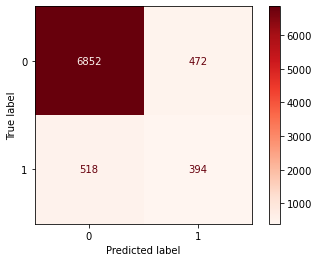

In [152]:
print('f1-score - Test-set before tunning   : ', f1_score(y_test, y_pred_test_xgb, average='weighted'), '\n')
print('f1 score - Test Set after tunning    : ', f1_score(y_test, y_pred_test_xgboost_best, average= 'weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_xgboost_best), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgboost_gridcv_best, X_test_final, y_test, cmap='Reds'))

# Model Inference

In [153]:
# Display Inference-Set

data_inf_clear

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49.0,admin.,married,high.school,no,no,no,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
1,32.0,technician,single,university.degree,no,yes,no,cellular,apr,thu,2.0,1.0,failure,-1.8,93.075,-47.1,1.483,5099.1,0
2,31.0,technician,divorced,university.degree,no,yes,no,cellular,aug,thu,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
3,29.0,management,single,university.degree,no,no,no,cellular,nov,wed,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,1
4,28.0,services,single,high.school,no,no,no,cellular,may,wed,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,1
5,43.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,1.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0
6,23.0,admin.,single,university.degree,no,yes,no,cellular,mar,thu,2.0,0.0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0
7,46.0,services,married,professional.course,no,yes,no,telephone,may,tue,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


In [154]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf_clear[num_columns]
data_inf_cat_ordinal = data_inf_clear[cat_columns_ordinal]
data_inf_cat_nominal = data_inf_clear[cat_columns_nominal]

In [155]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_ordinal_scaled = encoder2.transform(data_inf_cat_ordinal)
data_inf_cat_nominal_scaled = encoder.transform(data_inf_cat_nominal)

In [156]:
# Merge Numerical Data and Categorical Data

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_ordinal_scaled, data_inf_cat_nominal_scaled], axis=1)

In [157]:
# Predict Inference-Set

y_pred_inf = model_xgb.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Subscribe-prediction'])

In [158]:
# Concat Inference-Set with Prediction

pd.concat([data_inf_clear, y_pred_inf_df], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Subscribe-prediction
0,49.0,admin.,married,high.school,no,no,no,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,0
1,32.0,technician,single,university.degree,no,yes,no,cellular,apr,thu,2.0,1.0,failure,-1.8,93.075,-47.1,1.483,5099.1,0,0
2,31.0,technician,divorced,university.degree,no,yes,no,cellular,aug,thu,2.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0
3,29.0,management,single,university.degree,no,no,no,cellular,nov,wed,1.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,1,0
4,28.0,services,single,high.school,no,no,no,cellular,may,wed,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,1,0
5,43.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,1.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0,0
6,23.0,admin.,single,university.degree,no,yes,no,cellular,mar,thu,2.0,0.0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0,0
7,46.0,services,married,professional.course,no,yes,no,telephone,may,tue,4.0,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0,0


# Pengambilan Kesimpulan

- Pada dataset ini dilakukan pemodelan menggunakan 7 type pemodelan, yaitu LogisticRegression, SVM, Decission tree, random forest, kNN, Naive bayes, dan XGBoost
- Dari hasil pemodelan yang sudah dilakukan selain XGBoost pemodelan yang lain terdapat nilai overfit antara train-set dengan test-set nya
- Dari hasil pemodelan yang sudah dilakukan didapati nilai f1 score terbesar terdapat pada pemodelan XGBoost dengan nilai f1 score pada train-set sebesar : 0.9050759141398964 dan pada test-set sebesar : 0.8767634926449885
- Sedangkan didapati nilai f1 score terkecil terdapat pada pemodelan Naive bayes dengan nilai f1 score pada train-set sebesar : 0.8367841846212773 dan pada test-set sebesar : 0.10665124707283048
- Overfit yang didapati pada pemodelan selain XGBosst dapat disebabkan karena terdapat banyak nilai missing value pada data, sehingga pada saat melakukan handling terdapat beberapa label yang kurang tepat. Disarankan untuk divisi terkait untuk menindak lanjuti lagi setiap nilai yang terdapat pada kolom tersebut
- Pada pemodelan XGBoost dilakukan Hyperparameter tunning menggunakan GridSearchCV untuk menentukan parameter terbaik yang dapat digunakan untuk meningkatkan akurasi dari pemodelan tersebut
- Setelah dilakukan Hyperparameter tunning, akurasi f1 score pada test-set yang sebelumnya bernilai : 0.8767634926449885 mengalami peningkatan menjadi 0.8784292238832064
- Ada kemungkinan jika dilakukan eksplorasi lebih lanjut terkait missing value serta algoritma lian yang digunakan mungkin tingkat akurasi dari machine learning ini dapat lebih baik lagi